# EDA and Feature Engg Part 3
# flight_price_prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_excel("Data_Train_Flight_prediction.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_test=pd.read_excel('Test_set_Flight_prediction.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
df=pd.concat([df_train,df_test],axis=0)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


<Axes: xlabel='Airline', ylabel='Price'>

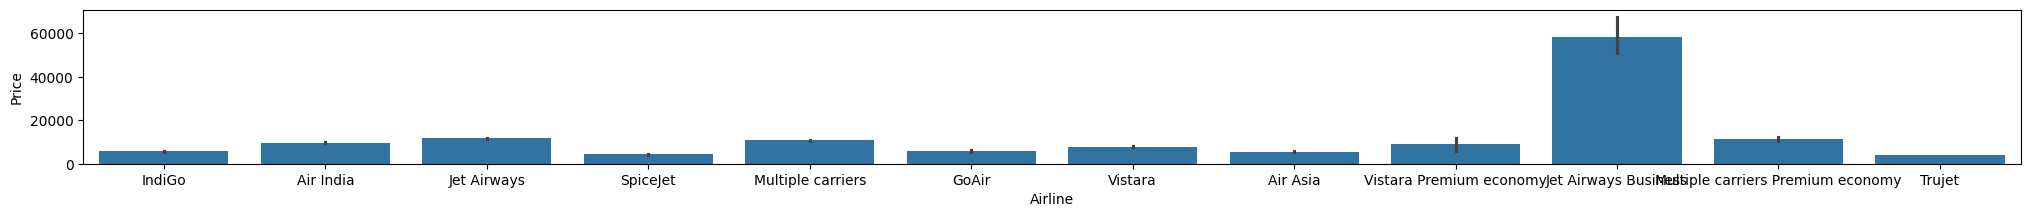

In [5]:
fig, ax = plt.subplots(figsize=(25, 2))
sns.barplot(x=df_train['Airline'],y=df_train['Price'],ax=ax)


<Axes: xlabel='Duration', ylabel='Price'>

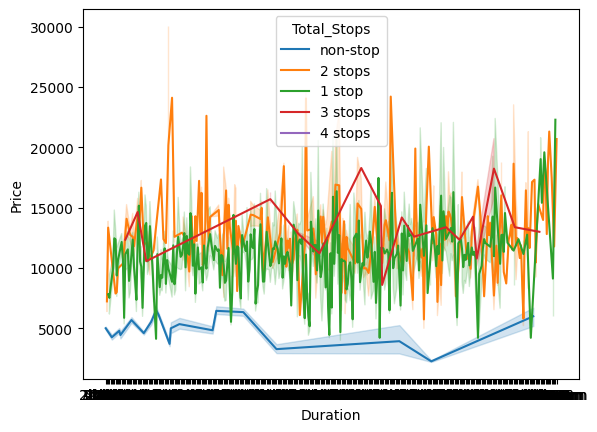

In [6]:
sns.lineplot (data=df_train,x=df_train["Duration"],y=df_train['Price'],hue=df_train["Total_Stops"])

# Feature Engg

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


# handling Date_of_journey

In [8]:

df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


# object to int type conversion

In [9]:
df['date']=df['date'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  date             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


# Total_Stops

In [10]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
df[df['Total_Stops'].isnull()]


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,6,5,2019


In [12]:
df['Total_Stops']=df['Total_Stops'].fillna('non-stop')
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [13]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})
df["Total_Stops"]=df["Total_Stops"].astype(int)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [14]:
df.iloc[9039,:]

Airline               Air India
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                   0
Additional_Info         No info
Price                    7480.0
date                          6
month                         5
year                       2019
Name: 9039, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13354 non-null  int32  
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  date             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  year             13354 non-null  int32  
dtypes: float64(1), int32(4), object(8)
memory usage: 1.2+ MB


# Duration

In [16]:
df['duration_hour']=df['Duration'].str.split(" ").str[0]
df['duration_minute']=df['Duration'].str.split(" ").str[1].str.split("m").str[0]

In [17]:
df.iloc[6474,13]='5h'
df.iloc[2660,13]='5h'


In [18]:
df=df.drop(2660,axis=0)

In [19]:
df[df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute


In [20]:
df['duration_hour'].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '41h', '40h'], dtype=object)

In [21]:
df['duration_hour']=df['duration_hour'].str.split('h').str[0].astype(int)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,2019,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019,4,45


In [23]:
df["duration_minute"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [24]:
df[df["duration_minute"].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,2019,19,NaN
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2,No info,13381.0,12,6,2019,23,NaN
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2,In-flight meal not included,10919.0,15,6,2019,22,NaN
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1,No info,13062.0,21,3,2019,12,NaN
53,IndiGo,Banglore,Delhi,BLR → DEL,21:15,00:15 19 Jun,3h,0,No info,3943.0,18,6,2019,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Air India,Delhi,Cochin,DEL → COK,14:10,17:10,3h,0,No info,NaN,27,3,2019,3,NaN
2598,Jet Airways,Delhi,Cochin,DEL → BOM → COK,08:00,19:00,11h,1,No info,NaN,9,6,2019,11,NaN
2604,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,09:15,19:15,10h,1,No info,NaN,12,6,2019,10,NaN
2607,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,NaN,3,3,2019,13,NaN


In [25]:
df["duration_minute"]=df["duration_minute"].fillna(0)

In [26]:
df["duration_minute"].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [27]:
df["duration_minute"]=df["duration_minute"].astype(int)

In [28]:
df.drop('Duration',axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Route            13351 non-null  object 
 4   Dep_Time         13352 non-null  object 
 5   Arrival_Time     13352 non-null  object 
 6   Total_Stops      13352 non-null  int32  
 7   Additional_Info  13352 non-null  object 
 8   Price            10682 non-null  float64
 9   date             13352 non-null  int32  
 10  month            13352 non-null  int32  
 11  year             13352 non-null  int32  
 12  duration_hour    13352 non-null  int32  
 13  duration_minute  13352 non-null  int32  
dtypes: float64(1), int32(6), object(7)
memory usage: 1.2+ MB


In [30]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897.0,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662.0,1,5,2019,7,25


# departure time

In [31]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_mint']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [32]:
df.drop('Dep_Time',axis=1,inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Route            13351 non-null  object 
 4   Arrival_Time     13352 non-null  object 
 5   Total_Stops      13352 non-null  int32  
 6   Additional_Info  13352 non-null  object 
 7   Price            10682 non-null  float64
 8   date             13352 non-null  int32  
 9   month            13352 non-null  int32  
 10  year             13352 non-null  int32  
 11  duration_hour    13352 non-null  int32  
 12  duration_minute  13352 non-null  int32  
 13  Dep_hour         13352 non-null  int32  
 14  Dep_mint         13352 non-null  int32  
dtypes: float64(1), int32(8), object(6)
memory usage: 1.2+ MB


In [34]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,No info,3897.0,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,No info,7662.0,1,5,2019,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2,No info,13882.0,9,6,2019,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1,No info,6218.0,12,5,2019,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1,No info,13302.0,1,3,2019,4,45,16,50


In [35]:
df.drop('Route',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,No info,3897.0,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,13:15,2,No info,7662.0,1,5,2019,7,25,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2,No info,13882.0,9,6,2019,19,0,9,25
3,IndiGo,Kolkata,Banglore,23:30,1,No info,6218.0,12,5,2019,5,25,18,5
4,IndiGo,Banglore,New Delhi,21:35,1,No info,13302.0,1,3,2019,4,45,16,50


# Arrival_Time

In [36]:
df['arrival_hour']=df['Arrival_Time'].str.split(" ").str[0].str.split(':').str[0].astype(int)
df['arrival_mint']=df['Arrival_Time'].str.split(" ").str[0].str.split(':').str[1].astype(int)

In [37]:
df.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,arrival_hour,arrival_mint
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,No info,3897.0,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,13:15,2,No info,7662.0,1,5,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2,No info,13882.0,9,6,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,23:30,1,No info,6218.0,12,5,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,1,No info,13302.0,1,3,2019,4,45,16,50,21,35


In [38]:
df.drop("Arrival_Time",axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Total_Stops      13352 non-null  int32  
 4   Additional_Info  13352 non-null  object 
 5   Price            10682 non-null  float64
 6   date             13352 non-null  int32  
 7   month            13352 non-null  int32  
 8   year             13352 non-null  int32  
 9   duration_hour    13352 non-null  int32  
 10  duration_minute  13352 non-null  int32  
 11  Dep_hour         13352 non-null  int32  
 12  Dep_mint         13352 non-null  int32  
 13  arrival_hour     13352 non-null  int32  
 14  arrival_mint     13352 non-null  int32  
dtypes: float64(1), int32(10), object(4)
memory usage: 1.1+ MB


In [40]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,arrival_hour,arrival_mint
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,4,45,16,50,21,35


In [41]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
laber_encoder=LabelEncoder()

In [43]:
df['Additional_Info']=laber_encoder.fit_transform(df['Additional_Info'])
df['Airline']=laber_encoder.fit_transform(df['Airline'])
df['Source']=laber_encoder.fit_transform(df['Source'])
df['Destination']=laber_encoder.fit_transform(df['Destination'])

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,arrival_hour,arrival_mint
0,3,0,5,0,8,3897.0,24,3,2019,2,50,22,20,1,10
1,1,3,0,2,8,7662.0,1,5,2019,7,25,5,50,13,15
2,4,2,1,2,8,13882.0,9,6,2019,19,0,9,25,4,25
3,3,3,0,1,8,6218.0,12,5,2019,5,25,18,5,23,30
4,3,0,5,1,8,13302.0,1,3,2019,4,45,16,50,21,35


In [45]:
df_final=pd.get_dummies(df,columns=['Airline','Source','Destination'],drop_first=True,dtype=int)
df_final

,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0,8,3897.0,24,3,2019,2,50,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2,8,7662.0,1,5,2019,7,25,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2,8,13882.0,9,6,2019,19,0,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1,8,6218.0,12,5,2019,5,25,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1,8,13302.0,1,3,2019,4,45,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,8,NaN,6,6,2019,23,55,20,30,...,0,0,0,1,0,0,0,0,0,0
2667,0,8,NaN,27,3,2019,2,35,14,20,...,0,0,0,1,0,0,0,0,0,0
2668,1,8,NaN,6,3,2019,6,35,21,50,...,0,0,1,0,0,1,0,0,0,0
2669,1,8,NaN,6,3,2019,15,15,4,0,...,0,0,1,0,0,1,0,0,0,0


In [46]:
df_final.isnull().sum()

Total_Stops           0
Additional_Info       0
Price              2670
date                  0
month                 0
year                  0
duration_hour         0
duration_minute       0
Dep_hour              0
Dep_mint              0
arrival_hour          0
arrival_mint          0
Airline_1             0
Airline_2             0
Airline_3             0
Airline_4             0
Airline_5             0
Airline_6             0
Airline_7             0
Airline_8             0
Airline_9             0
Airline_10            0
Airline_11            0
Source_1              0
Source_2              0
Source_3              0
Source_4              0
Destination_1         0
Destination_2         0
Destination_3         0
Destination_4         0
Destination_5         0
dtype: int64

In [47]:
#unknown_price value
df_unknown=df_final[df_final['Price'].isnull()]
df_desired=df_unknown.drop("Price",axis=1)


In [48]:
#model fitting is done on this dataframe
df_new=df_final[~df_final['Price'].isnull()]
df_new

,Total_Stops,Additional_Info,Price,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0,8,3897.0,24,3,2019,2,50,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2,8,7662.0,1,5,2019,7,25,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2,8,13882.0,9,6,2019,19,0,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1,8,6218.0,12,5,2019,5,25,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1,8,13302.0,1,3,2019,4,45,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,8,4107.0,9,4,2019,2,30,19,55,...,0,0,0,1,0,0,0,0,0,0
10679,0,8,4145.0,27,4,2019,2,35,20,45,...,0,0,0,1,0,0,0,0,0,0
10680,0,8,7229.0,27,4,2019,3,0,8,20,...,0,0,0,0,0,0,1,0,0,0
10681,0,8,12648.0,1,3,2019,2,40,11,30,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x=df_new.drop('Price',axis=1)
y=df_new['Price']

In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total_Stops      10682 non-null  int32  
 1   Additional_Info  10682 non-null  int32  
 2   Price            10682 non-null  float64
 3   date             10682 non-null  int32  
 4   month            10682 non-null  int32  
 5   year             10682 non-null  int32  
 6   duration_hour    10682 non-null  int32  
 7   duration_minute  10682 non-null  int32  
 8   Dep_hour         10682 non-null  int32  
 9   Dep_mint         10682 non-null  int32  
 10  arrival_hour     10682 non-null  int32  
 11  arrival_mint     10682 non-null  int32  
 12  Airline_1        10682 non-null  int32  
 13  Airline_2        10682 non-null  int32  
 14  Airline_3        10682 non-null  int32  
 15  Airline_4        10682 non-null  int32  
 16  Airline_5        10682 non-null  int32  
 17  Airline_6        

In [100]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)  
scaler.transform(x_test)

array([[ 0.25690675, -2.0157985 ,  0.52674023, ..., -0.26308187,
        -0.19318293, -0.30830147],
       [ 1.73565331,  0.49413079, -1.47947508, ..., -0.26308187,
        -0.19318293,  3.24357846],
       [ 0.25690675,  0.49413079, -0.53537376, ..., -0.26308187,
        -0.19318293, -0.30830147],
       ...,
       [ 0.25690675,  0.49413079, -0.88941175, ..., -0.26308187,
        -0.19318293, -0.30830147],
       [ 0.25690675,  0.49413079, -0.18133576, ..., -0.26308187,
        -0.19318293, -0.30830147],
       [ 0.25690675, -2.0157985 ,  0.88077822, ..., -0.26308187,
        -0.19318293,  3.24357846]])

In [52]:
m=y_test
m.info()

<class 'pandas.core.series.Series'>
Index: 3205 entries, 6076 to 7878
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
3205 non-null   float64
dtypes: float64(1)
memory usage: 50.1 KB


In [53]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

In [54]:
import xgboost as xg

In [55]:
lin_reg=LinearRegression()
lasso_reg=Lasso()
ridge_reg=Ridge()
decision_tree=DecisionTreeRegressor()
knn=KNeighborsRegressor(n_neighbors=23)  #we have to find K
xg_regressor = xg.XGBRegressor()
bag_reg = BaggingRegressor()
random_forest= RandomForestRegressor()
gradient_boosting=GradientBoostingRegressor()
adb_reg=AdaBoostRegressor()
naive_reg=GaussianNB()
svr=SVR()

In [56]:
lin_reg.fit(x_train,y_train)
lasso_reg.fit(x_train,y_train)
ridge_reg.fit(x_train,y_train)
decision_tree.fit(x_train,y_train)
knn.fit(x_train,y_train)
xg_regressor.fit(x_train,y_train)
bag_reg.fit(x_train,y_train)
random_forest.fit(x_train,y_train)
gradient_boosting.fit(x_train,y_train)
adb_reg.fit(x_train,y_train)
naive_reg.fit(x_train,y_train)
svr.fit(x_train,y_train)

SVR()

In [57]:
y_pred_lin_reg=lin_reg.predict(x_test)
y_pred_lasso=lasso_reg.predict(x_test)
y_pred_ridge=ridge_reg.predict(x_test)
y_pred_tree=decision_tree.predict(x_test)
y_pred_knn=knn.predict(x_test)
y_pred_xg_regressor=xg_regressor.predict(x_test)
y_pred_bag_reg=bag_reg.predict(x_test)
y_pred_random_forest=random_forest.predict(x_test)
y_pred_gradient_boosting=gradient_boosting.predict(x_test)
y_pred_adb_reg=adb_reg.predict(x_test)
y_pred_naive_reg=naive_reg.predict(x_test)
y_pred_svr=svr.predict(x_test)

In [58]:
algo=[y_pred_lin_reg,y_pred_lasso,y_pred_ridge,y_pred_tree,y_pred_knn,y_pred_xg_regressor,y_pred_bag_reg,y_pred_random_forest,y_pred_gradient_boosting,y_pred_adb_reg,y_pred_naive_reg,y_pred_svr]

In [59]:
import math

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse=[]
mae=[]
for i in algo:
    rmse_i=math.sqrt(mean_squared_error(i,y_test))
    mae_i=mean_absolute_error(i,y_test)
    rmse.append(rmse_i)
    mae.append(mae_i)

In [61]:
rmse

[2684.7929413245915,
 2686.1959281106074,
 2690.018178428475,
 2098.2705199046636,
 3226.625623185938,
 1444.484687759594,
 1630.1069592290532,
 1582.9096171350993,
 1856.5569290080139,
 4214.3424361687075,
 2291.6527846031577,
 4559.002510432127]

In [62]:
mae

[1818.3269045760887,
 1818.4061188831124,
 1823.0515165980935,
 796.2779511180446,
 2186.5171674693074,
 766.5251092348382,
 710.6744093306589,
 678.7674639192234,
 1248.6300872654995,
 3593.199524577141,
 1073.1354134165367,
 3579.43487709443]

In [63]:
from sklearn.metrics import r2_score
#lin_regression
r2_score_lin_reg=r2_score(y_pred_lin_reg,y_test)
adj_r2_score_lin_reg = 1-(1-r2_score_lin_reg)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#lasso
r2_score_lasso=r2_score(y_pred_lasso,y_test)
adj_r2_score_lasso= 1-(1-r2_score_lasso)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#ridge
r2_score_ridge=r2_score(y_pred_ridge,y_test)
adj_r2_score_ridge = 1-(1-r2_score_ridge)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#decision tree
r2_score_tree=r2_score(y_pred_tree,y_test)
adj_r2_score_tree = 1-(1-r2_score_tree)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#knn
r2_score_knn=r2_score(y_pred_knn,y_test)
adj_r2_score_knn = 1-(1-r2_score_knn)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#Xgradient
r2_score_xg_regressor=r2_score(y_pred_xg_regressor,y_test)
adj_r2_score_xg_regressor = 1-(1-r2_score_xg_regressor)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#bagging regressor
r2_score_bag_reg=r2_score(y_pred_bag_reg,y_test)
adj_r2_score_bag_reg = 1-(1-r2_score_bag_reg)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#random_forest
r2_score_random_forest=r2_score(y_pred_random_forest,y_test)
adj_r2_score_random_forest = 1-(1-r2_score_random_forest)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
# gradient_boosting
r2_score_gradient_boosting=r2_score(y_pred_gradient_boosting,y_test)
adj_r2_score_gradient_boosting= 1-(1-r2_score_gradient_boosting)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#adaboost regression
r2_score_adb_reg=r2_score(y_pred_adb_reg,y_test)
adj_r2_score_adb_reg = 1-(1-r2_score_adb_reg)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#naive baye's
r2_score_naive_reg=r2_score(y_pred_naive_reg,y_test)
adj_r2_score_naive_reg = 1-(1-r2_score_naive_reg)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#SVR
r2_score_svr=r2_score(y_pred_svr,y_test)
adj_r2_score_svr = 1-(1-r2_score_svr)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)



In [64]:
r2_score_list=[r2_score_lin_reg,r2_score_lasso,r2_score_ridge,r2_score_tree,r2_score_knn,r2_score_xg_regressor,r2_score_bag_reg,r2_score_random_forest,r2_score_gradient_boosting,r2_score_adb_reg,r2_score_naive_reg,r2_score_svr]

In [65]:
adj_r2_score_list=[adj_r2_score_lin_reg,adj_r2_score_lasso,adj_r2_score_ridge,adj_r2_score_tree,adj_r2_score_knn,adj_r2_score_xg_regressor,adj_r2_score_bag_reg,adj_r2_score_random_forest,adj_r2_score_gradient_boosting,adj_r2_score_adb_reg,adj_r2_score_naive_reg,adj_r2_score_svr]

In [66]:
algo_name=['y_pred_lin_reg','y_pred_lasso','y_pred_ridge','y_pred_tree','y_pred_knn','y_pred_xg_regressor','y_pred_bag_reg','y_pred_random_forest','y_pred_gradient_boosting','y_pred_adb_reg','y_pred_naive_reg','y_pred_svr']

In [67]:
len(algo)

12

In [68]:
from sklearn.model_selection import cross_val_score
score_xgb=cross_val_score(xg_regressor,x_train,y_train,cv=20,scoring="neg_mean_squared_error")
score_xgb.mean()

-2389768.429591554

In [69]:
for i in range (1,12): 
    print(algo_name[i])
    #print("\n")
    print("MAE :" ,mae[i])
    print("RMSE :" ,rmse[i])
    print("R2_Score :",r2_score_list[i])
    print("Adjusted R2_Score :",adj_r2_score_list[i])
    print("\n")
    

y_pred_lasso
MAE : 1818.4061188831124
RMSE : 2686.1959281106074
R2_Score : 0.4721475742859529
Adjusted R2_Score : 0.4669904910218068


y_pred_ridge
MAE : 1823.0515165980935
RMSE : 2690.018178428475
R2_Score : 0.46489735456863446
Adjusted R2_Score : 0.4596694371376946


y_pred_tree
MAE : 796.2779511180446
RMSE : 2098.2705199046636
R2_Score : 0.7841461639777862
Adjusted R2_Score : 0.7820372862857948


y_pred_knn
MAE : 2186.5171674693074
RMSE : 3226.625623185938
R2_Score : -0.12210501257308448
Adjusted R2_Score : -0.13306790428117332


y_pred_xg_regressor
MAE : 766.5251092348382
RMSE : 1444.484687759594
R2_Score : 0.8867855861491059
Adjusted R2_Score : 0.8856794888187001


y_pred_bag_reg
MAE : 710.6744093306589
RMSE : 1630.1069592290532
R2_Score : 0.8546029485312479
Adjusted R2_Score : 0.8531824289612726


y_pred_random_forest
MAE : 678.7674639192234
RMSE : 1582.9096171350993
R2_Score : 0.8615137458601453
Adjusted R2_Score : 0.8601607443226932


y_pred_gradient_boosting
MAE : 1248.6300872

# xtreme_gradientboosting_regressor gives best r2_score
from the above result it is clear that extreme_gradientboosting_regressor,bagging regressor and random forest give best result
Now predict the unknown value of price using extreme_gradient_boosting_algo

In [70]:
price_actual=pd.DataFrame(m)
print(price_actual['Price'].isnull().sum())
price_actual

0


,Price
6076,10844.0
3545,19372.0
9291,9187.0
5033,13941.0
2483,12898.0
...,...
7918,14714.0
5859,8372.0
2690,8137.0
4487,13626.0


In [71]:
price_actual.to_csv("Actual_Price.csv")

In [72]:
df_df=pd.read_csv("Actual_Price.csv")
df_df.columns

Index(['Unnamed: 0', 'Price'], dtype='object')

In [73]:
df_df.drop('Unnamed: 0',axis=1,inplace=True)
df_df.head()

,Price
0,10844.0
1,19372.0
2,9187.0
3,13941.0
4,12898.0


# this is the actual price value vs predicted_Price value

In [74]:
y_pred_xg_regressor=xg_regressor.predict(x_test)
df_compare=pd.DataFrame(y_pred_xg_regressor.T,columns=['Price_Predict'])
df_compare['Price_actual']=df_df["Price"]
df_compare

,Price_Predict,Price_actual
0,10289.107422,10844.0
1,16795.558594,19372.0
2,8217.583008,9187.0
3,14165.676758,13941.0
4,11712.495117,12898.0
...,...,...
3200,15272.873047,14714.0
3201,8308.402344,8372.0
3202,8609.778320,8137.0
3203,13310.304688,13626.0


In [75]:
df_compare.corr()

,Price_Predict,Price_actual
Price_Predict,1.000000,0.947407
Price_actual,0.947407,1.000000


<Axes: >

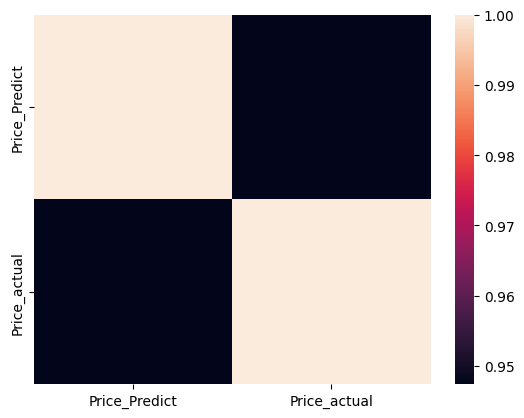

In [76]:
sns.heatmap(df_compare.corr())

# Prediction of Price of unknown value

In [77]:
price_unknown=np.array(xg_regressor.predict(df_desired))
price_unknown

array([13913.846 ,  4396.0776, 12429.021 , ..., 16397.717 , 11770.265 ,
        8397.148 ], dtype=float32)

In [78]:
df_unknown_price=pd.DataFrame(price_unknown.T,columns=['Price'])
df_unknown_price

,Price
0,13913.845703
1,4396.077637
2,12429.021484
3,11400.157227
4,3783.549805
...,...
2665,9934.295898
2666,4339.137695
2667,16397.716797
2668,11770.264648


In [79]:
df_desired['Price']=df_unknown_price["Price"]

In [80]:
df_desired

,Total_Stops,Additional_Info,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,arrival_hour,...,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Price
0,1,8,6,6,2019,10,55,17,30,4,...,0,1,0,0,1,0,0,0,0,13913.845703
1,1,8,12,5,2019,4,0,6,20,10,...,0,0,1,0,0,0,0,0,0,4396.077637
2,1,5,21,5,2019,23,45,19,15,19,...,0,1,0,0,1,0,0,0,0,12429.021484
3,1,8,21,5,2019,13,0,8,0,21,...,0,1,0,0,1,0,0,0,0,11400.157227
4,0,8,24,6,2019,2,50,23,55,2,...,0,0,0,0,0,1,0,0,0,3783.549805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,8,6,6,2019,23,55,20,30,20,...,0,0,1,0,0,0,0,0,0,4339.137695
2667,0,8,27,3,2019,2,35,14,20,16,...,0,0,1,0,0,0,0,0,0,16397.716797
2668,1,8,6,3,2019,6,35,21,50,4,...,0,1,0,0,1,0,0,0,0,11770.264648
2669,1,8,6,3,2019,15,15,4,0,19,...,0,1,0,0,1,0,0,0,0,8397.148438


Text(0.5, 1.0, 'This the is predicted value')

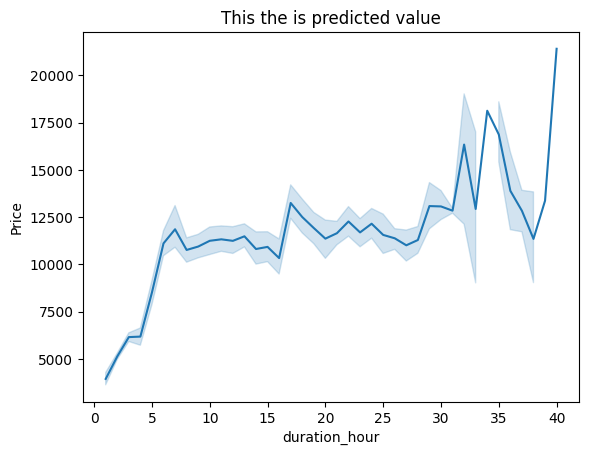

In [81]:
sns.lineplot(x=df_desired['duration_hour'],y=df_desired['Price'])
plt.title("This the is predicted value")

Text(0.5, 1.0, 'This is the dataset value')

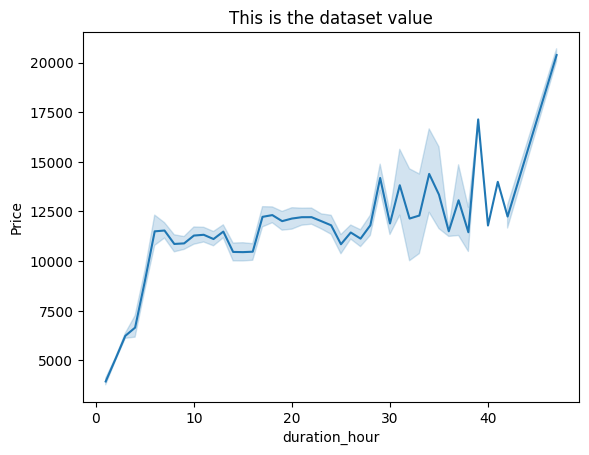

In [82]:
sns.lineplot(x=df_new['duration_hour'],y=df_new['Price'])
plt.title("This is the dataset value")

# Tuning of HyperParameter

In [83]:
#Xgbooster hyperparameter tuning
#xg_regressor
params={
    "learning_rate":[0.05,0.5,0.1,0.2,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8],   #learning rate<0.05 causes overfiting and taking more time to execute
    "max_depth":[1,2,3,6,9,12,15,18,21,25,27,29,30],
    "gamma":[0,0.1,0.2,0.4,0.5,0.6,0.7,0.8],   #to chech wheather postprunning is suitable or not [cover_value]
    "min_child_weight":[1,3,5,7,9,10,8,6],
    "colsample_bytree" :[0.3,0.4,0.5,0.7,0.6,0.9]
}

In [84]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(xg_regressor,param_distributions=params, n_iter=5,scoring="neg_mean_squared_error",n_jobs=-1,cv=10,verbose=3)

In [85]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.6, 0.9],
                                        'gamma': [0, 0.1, 0.2, 0.4, 0.5, 0.6,
                                                  0.7, 0.8],
                                        'learning_rate': [0.05, 0.5, 0.1, 0.2,
                                                          0.3, 0.35, 0.4, 0.45,
                                                          0.5, 0.6, 0.7, 0.8],
                                        'max_depth': [1, 2, 3, 6, 9, 12, 15, 18,
                                                      21, 25, 27, 29, 30],
                                        'min_child_weight': [1, 3, 5, 7, 9, 10,
                                                             8, 6]},
                   scoring='neg_mean_squared_error', verbose=3)

In [86]:
random_search.best_params_

{'min_child_weight': 10,
 'max_depth': 9,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.4}

In [87]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
xg_regressor_update=xg.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.7, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.35, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=10,  monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [89]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(xg_regressor_update,x_train,y_train,cv=10,scoring="neg_mean_squared_error")
score.mean()

-2745398.6602883367

In [90]:
#before hyperparameter tuning
score_xg=cross_val_score(xg_regressor,x_train,y_train,cv=10,scoring="neg_mean_squared_error")
score_xg.mean()

-2486906.726180494

# comparing the neg_mean_squared_error before and after hyperparameter tuning

In [91]:
print("Before hyperparameter tuning score is :",score_xg.mean())
print("After hyperparameter tuning score is :",score.mean())

Before hyperparameter tuning score is : -2486906.726180494
After hyperparameter tuning score is : -2745398.6602883367


# improving the accuracy of model

In [92]:
xg_regressor_update.fit(x_test,y_test)
y_pred_update=xg_regressor_update.predict(x_test)
df_compare['Price_updated_model']=pd.DataFrame(y_pred_update.T,columns=["Price_updated_model"])

In [93]:
df_compare

,Price_Predict,Price_actual,Price_updated_model
0,10289.107422,10844.0,10863.512695
1,16795.558594,19372.0,18874.769531
2,8217.583008,9187.0,8797.417969
3,14165.676758,13941.0,13902.145508
4,11712.495117,12898.0,13091.822266
...,...,...,...
3200,15272.873047,14714.0,15172.318359
3201,8308.402344,8372.0,8321.262695
3202,8609.778320,8137.0,8448.256836
3203,13310.304688,13626.0,13561.330078


In [94]:
df_update=df_desired.drop("Price",axis=1)

In [95]:
y_unknown_update=xg_regressor_update.predict(df_update)
y_unknown_update

array([14621.293 ,  4089.1829, 12983.823 , ..., 16520.775 , 12166.013 ,
        7484.107 ], dtype=float32)

In [96]:
df_desired['Price_updated']=pd.DataFrame(y_unknown_update.T,columns=["Price_updated_model"])
df_desired

,Total_Stops,Additional_Info,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,arrival_hour,...,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Price,Price_updated
0,1,8,6,6,2019,10,55,17,30,4,...,1,0,0,1,0,0,0,0,13913.845703,14621.292969
1,1,8,12,5,2019,4,0,6,20,10,...,0,1,0,0,0,0,0,0,4396.077637,4089.182861
2,1,5,21,5,2019,23,45,19,15,19,...,1,0,0,1,0,0,0,0,12429.021484,12983.823242
3,1,8,21,5,2019,13,0,8,0,21,...,1,0,0,1,0,0,0,0,11400.157227,8182.403320
4,0,8,24,6,2019,2,50,23,55,2,...,0,0,0,0,1,0,0,0,3783.549805,3306.937256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,8,6,6,2019,23,55,20,30,20,...,0,1,0,0,0,0,0,0,4339.137695,5178.827148
2667,0,8,27,3,2019,2,35,14,20,16,...,0,1,0,0,0,0,0,0,16397.716797,16520.775391
2668,1,8,6,3,2019,6,35,21,50,4,...,1,0,0,1,0,0,0,0,11770.264648,12166.012695
2669,1,8,6,3,2019,15,15,4,0,19,...,1,0,0,1,0,0,0,0,8397.148438,7484.106934


In [97]:
df_desired['Price'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670     True
Name: Price, Length: 2670, dtype: bool

In [98]:
df_desired.drop(index=2670,inplace=True)

In [99]:
df_desired

,Total_Stops,Additional_Info,date,month,year,duration_hour,duration_minute,Dep_hour,Dep_mint,arrival_hour,...,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Price,Price_updated
0,1,8,6,6,2019,10,55,17,30,4,...,1,0,0,1,0,0,0,0,13913.845703,14621.292969
1,1,8,12,5,2019,4,0,6,20,10,...,0,1,0,0,0,0,0,0,4396.077637,4089.182861
2,1,5,21,5,2019,23,45,19,15,19,...,1,0,0,1,0,0,0,0,12429.021484,12983.823242
3,1,8,21,5,2019,13,0,8,0,21,...,1,0,0,1,0,0,0,0,11400.157227,8182.403320
4,0,8,24,6,2019,2,50,23,55,2,...,0,0,0,0,1,0,0,0,3783.549805,3306.937256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0,7,21,6,2019,1,30,22,45,0,...,0,0,1,0,0,1,0,0,9934.295898,9013.038086
2666,1,8,6,6,2019,23,55,20,30,20,...,0,1,0,0,0,0,0,0,4339.137695,5178.827148
2667,0,8,27,3,2019,2,35,14,20,16,...,0,1,0,0,0,0,0,0,16397.716797,16520.775391
2668,1,8,6,3,2019,6,35,21,50,4,...,1,0,0,1,0,0,0,0,11770.264648,12166.012695


# complete modelling and prediction is done